# Data Preprocessing

In [4]:
# Important libraries
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import csv
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# File paths
fp_notebooks_folder = "./"
fp_code_folder = "../"
fp_processed_folder = os.path.join(fp_code_folder, "../processed_data")
fp_converted_folder = os.path.join(fp_processed_folder, "converted_to_csv")
fp_downsampled_folder = os.path.join(fp_processed_folder, "downsampled")
fp_downsampled_concatenated_file = os.path.join(fp_downsampled_folder, "concatenated.csv")
fp_downsampled_continuous_file = os.path.join(fp_downsampled_folder, "continous.csv")
fp_downsampled_continuous_ae_file = os.path.join(fp_downsampled_folder, "continous_ae.csv")
fp_downsampled_dropna_file = os.path.join(fp_downsampled_folder, "dropna.csv")
fp_downsampled_scaler_file = os.path.join(fp_downsampled_folder, "scaler.pkl")
fp_fields_file = os.path.join(fp_converted_folder, "fields.csv")

In [5]:
# Get fields file to analyse
fields_df = pd.read_csv(fp_fields_file, quoting=csv.QUOTE_NONE, escapechar='/', index_col=0)
fields_df

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n
4,0.976562,4606,5,1995-01-24,08:22:11,"['mmHg', 'mmHg', 'mmHg', 'bpm', '%']","['NBPmean', 'NBPsys', 'NBPdias', 'RESP', 'SpO2']",[],{'MULTIFORM VPBs': 4600},208n
...,...,...,...,...,...,...,...,...,...,...
111,0.976562,151176,14,1996-04-06,15:26:26,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'VPBs > 5/MIN': 20341, 'VPBs > 11/MIN': 1085,...",482n
112,0.976562,147656,15,1996-04-22,17:35:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'IRREGULAR HR': 19031, 'MULTIFORM VPBs': 1982...",484n
113,0.976562,154687,12,1996-04-29,14:48:52,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'PAIR VPBs': 731, 'VPBs > 11/MIN': 567, 'IRRE...",485n
114,0.976562,193946,18,1996-05-02,11:54:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'PAIR VPBs': 4158, 'RUN VPBs 3 - 9': 1688, 'M...",486n


In [6]:
def add_feat_names(fields_df):
    feat_names = []
    for i in range(len(fields_df)):
        row = fields_df.iloc[i]
        units_list, sig_list = eval(row["units"]), eval(row["sig_name"])
        cur_feat_names = {sig_list[j] + " (" + units_list[j] + ")" for j in range(len(units_list))}
        feat_names.append(cur_feat_names)
    return feat_names

fields_df["feat_cols"] = add_feat_names(fields_df)
fields_df

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{Tblood (degC), ABPdias (mmHg), PAPsys (mmHg),..."
4,0.976562,4606,5,1995-01-24,08:22:11,"['mmHg', 'mmHg', 'mmHg', 'bpm', '%']","['NBPmean', 'NBPsys', 'NBPdias', 'RESP', 'SpO2']",[],{'MULTIFORM VPBs': 4600},208n,"{NBPmean (mmHg), NBPdias (mmHg), NBPsys (mmHg)..."
...,...,...,...,...,...,...,...,...,...,...,...
111,0.976562,151176,14,1996-04-06,15:26:26,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'VPBs > 5/MIN': 20341, 'VPBs > 11/MIN': 1085,...",482n,"{Tblood (degC), ABPdias (mmHg), PAPsys (mmHg),..."
112,0.976562,147656,15,1996-04-22,17:35:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'IRREGULAR HR': 19031, 'MULTIFORM VPBs': 1982...",484n,"{Tblood (degC), ABPdias (mmHg), IMCO2 (mmHg), ..."
113,0.976562,154687,12,1996-04-29,14:48:52,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'PAIR VPBs': 731, 'VPBs > 11/MIN': 567, 'IRRE...",485n,"{Tblood (degC), ABPdias (mmHg), PAPsys (mmHg),..."
114,0.976562,193946,18,1996-05-02,11:54:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'PAIR VPBs': 4158, 'RUN VPBs 3 - 9': 1688, 'M...",486n,"{Tblood (degC), ABPdias (mmHg), IMCO2 (mmHg), ..."


## Select Feature Set

In [7]:
# Check what are the most common subset of features
def most_comment_subset_of_features(fields_df):
    feat_set_series = fields_df["feat_cols"]
    feat_set_counts = feat_set_series.value_counts().reset_index()
    feat_set_counts.columns = ["feat_set", "count"]
    feat_set_counts["num_features"] = [len(feat_set) for feat_set in feat_set_counts["feat_set"]]
    feat_set_counts = feat_set_counts.sort_values("num_features", ascending=True)
    num_unique_feat_sets = len(feat_set_counts)
    
    feat_set_inc_list = []
    for i in range(num_unique_feat_sets):
        total_count = 0
        potential_subset = feat_set_counts["feat_set"].iloc[i]
        for j in range(i,num_unique_feat_sets):
            potential_superset, count = feat_set_counts[["feat_set","count"]].iloc[j].values
            if potential_subset.issubset(potential_superset):
                total_count += count
        feat_set_inc_list.append({"feat_set": potential_subset, "inc_count": total_count})
    
    feat_set_inc_df = pd.DataFrame(feat_set_inc_list)
    
    return feat_set_counts, feat_set_inc_df.sort_values("inc_count", ascending=False)
feat_set_stats = most_comment_subset_of_features(fields_df)
display(feat_set_stats[0])
display(feat_set_stats[1])

,feat_set,count,num_features
39,{RESP (bpm)},1,1
1,"{RESP (bpm), SpO2 (%)}",12,2
35,"{SpO2 (%), C.O. (lpm), Tblood (degC)}",1,3
4,"{RESP (bpm), C.O. (lpm), SpO2 (%), Tblood (degC)}",6,4
32,"{IMCO2 (mmHg), RESP (bpm), AWRR (bpm), SpO2 (%...",1,5
5,"{NBPmean (mmHg), NBPdias (mmHg), NBPsys (mmHg)...",4,5
10,"{Tblood (degC), RESP (bpm), PAWP (mmHg), C.O. ...",2,5
16,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), A...",2,6
40,"{NBPmean (mmHg), NBPdias (mmHg), NBPsys (mmHg)...",1,6
14,"{NBPmean (mmHg), NBPdias (mmHg), NBPsys (mmHg)...",2,7


,feat_set,inc_count
0,{RESP (bpm)},90
1,"{RESP (bpm), SpO2 (%)}",88
7,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), A...",57
11,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P...",48
2,"{SpO2 (%), C.O. (lpm), Tblood (degC)}",37
16,"{ABPdias (mmHg), PAPsys (mmHg), ABPmean (mmHg)...",35
5,"{NBPmean (mmHg), NBPdias (mmHg), NBPsys (mmHg)...",32
20,"{ABPdias (mmHg), PAPsys (mmHg), RESP (bpm), AB...",27
8,"{NBPmean (mmHg), NBPdias (mmHg), NBPsys (mmHg)...",24
9,"{NBPmean (mmHg), NBPdias (mmHg), NBPsys (mmHg)...",23


In [8]:
feat_set = feat_set_stats[1].iloc[2][0]
print(feat_set)
# Check above count
def check_feat_set_count(fields_df, cur_feat_set):
    feat_set_series = fields_df["feat_cols"]
    count = 0
    for fs in feat_set_series:
        if cur_feat_set.issubset(fs):
            count += 1
    return count
print(check_feat_set_count(fields_df, cur_feat_set=feat_set))

{'ABPdias (mmHg)', 'RESP (bpm)', 'ABPmean (mmHg)', 'ABPsys (mmHg)', 'SpO2 (%)', 'HR (bpm)'}
57


/tmp/ipykernel_2929017/929749568.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feat_set = feat_set_stats[1].iloc[2][0]


In [9]:
# Shortlist patients with feat_set
def shortlist_patients_with_feat_set(fields_df, cur_feat_set):
    feat_set_series = fields_df["feat_cols"]
    records = []
    for i, fs in enumerate(feat_set_series):
        if cur_feat_set.issubset(fs):
            records.append(fields_df["record"].iloc[i])
    return records
shortlisted_records = shortlist_patients_with_feat_set(fields_df, cur_feat_set=feat_set)
print(len(shortlisted_records), "Records:", shortlisted_records)

57 Records: ['048n', '052n', '054n', '055n', '211n', '212n', '213n', '214n', '216n', '220n', '221n', '226n', '230n', '231n', '232n', '235n', '237n', '240n', '241n', '242n', '243n', '245n', '248n', '252n', '253n', '254n', '259n', '260n', '264n', '267n', '268n', '269n', '271n', '291n', '293n', '401n', '403n', '408n', '409n', '413n', '414n', '415n', '417n', '418n', '427n', '442n', '449n', '455n', '457n', '464n', '465n', '466n', '467n', '471n', '472n', '474n', '476n']


In [10]:
fields_df_shortlisted = fields_df[fields_df["record"].isin(shortlisted_records)]
fields_df_shortlisted

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{Tblood (degC), ABPdias (mmHg), PAPsys (mmHg),..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), A..."
8,0.976562,145275,10,1995-04-04,14:00:03,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PAPmea...",[],"{'VPBs > 5/MIN': 11644, 'MISSED BEATS': 10580...",212n,"{ABPdias (mmHg), PAPsys (mmHg), RESP (bpm), AB..."
9,0.976562,171093,7,1995-04-06,09:17:44,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'VPBs > 5/MIN': 3536, 'ABP 87 < 90': 717, ...",213n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
10,0.976562,90157,10,1995-04-19,07:14:25,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'NBPmea...",[],"{'RUN VPBs > 2': 3855, 'PAIR VPBs': 2566, 'VEN...",214n,"{ABPdias (mmHg), NBPmean (mmHg), NBPdias (mmHg..."
12,0.976562,95654,16,1995-05-07,14:11:32,"['mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmHg...","['ABPmean', 'ABPsys', 'ABPdias', 'ARTmean', 'A...",[],"{'VENT TRIGEMINY': 483, 'VPBs > 5/MIN': 389, ...",216n,"{ABPdias (mmHg), NBPmean (mmHg), NBPdias (mmHg..."
15,0.976562,4101,7,1995-05-17,08:26:10,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],{'MULTIFORM VPBs': 309},220n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."


In [11]:
fields_df_shortlisted.head()

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{Tblood (degC), ABPdias (mmHg), PAPsys (mmHg),..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), A..."


## Split Records into Train, Valid, Test Records

In [12]:
# split records by train, valid, test
def recordwise_train_valid_test_split(df, valid_prop, test_prop, seed):
    records = df["record"].unique()
    num_records = len(records)
    record_indices = np.arange(num_records)
    np.random.seed(seed=seed)
    np.random.shuffle(record_indices)
    shuffled_records = records[record_indices]
    num_valid, num_test = round(valid_prop * num_records), round(test_prop * num_records)
    num_train = num_records - num_valid - num_test
    train_records, valid_records, test_records = (
        shuffled_records[:num_train], shuffled_records[num_train: num_train+num_valid],
        shuffled_records[num_train+num_valid:num_train+num_valid+num_test],
    )
    return train_records, valid_records, test_records

train_records, valid_records, test_records = recordwise_train_valid_test_split(
    fields_df_shortlisted, valid_prop=0.1, test_prop=0.2, seed=2023)

In [13]:
print(len(train_records), "Train Records:", train_records)
print(len(valid_records), "Valid Records:", valid_records)
print(len(test_records), "Test Records:", test_records)

40 Train Records: ['474n' '269n' '241n' '232n' '230n' '242n' '221n' '048n' '220n' '415n'
 '418n' '403n' '226n' '259n' '268n' '401n' '464n' '260n' '476n' '237n'
 '471n' '427n' '054n' '243n' '442n' '414n' '245n' '455n' '409n' '052n'
 '211n' '293n' '216n' '417n' '235n' '472n' '267n' '457n' '214n' '449n']
6 Valid Records: ['467n' '466n' '253n' '212n' '413n' '231n']
11 Test Records: ['240n' '465n' '271n' '408n' '248n' '055n' '264n' '291n' '213n' '254n'
 '252n']


In [14]:
fields_df_shortlisted.head()

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), P..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{Tblood (degC), ABPdias (mmHg), PAPsys (mmHg),..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{ABPdias (mmHg), RESP (bpm), ABPmean (mmHg), A..."


## Load Data

In [15]:
def load_data(fields_df_shortlisted, feat_set):
    df_list = []
    records = fields_df_shortlisted["record"].tolist()
    for record in tqdm(records):
        fp_csv = os.path.join(fp_converted_folder, record+".csv")
        df = pd.read_csv(fp_csv, index_col=0)[list(feat_set)]
        df["record"] = record
        df_list.append(df)
    all_df = pd.concat(df_list).reset_index()
    all_df.columns = ["record_index"] + all_df.columns[1:].to_list()
    return all_df
all_df = load_data(fields_df_shortlisted, feat_set)
all_df.head()

  0%|                                                    | 0/57 [00:00<?, ?it/s]/tmp/ipykernel_2929017/3472446142.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv, index_col=0)[list(feat_set)]
  5%|██▎                                         | 3/57 [00:00<00:02, 26.65it/s]/tmp/ipykernel_2929017/3472446142.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv, index_col=0)[list(feat_set)]
 16%|██████▉                                     | 9/57 [00:00<00:02, 19.34it/s]/tmp/ipykernel_2929017/3472446142.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv, index_col=0)[list(feat_set)]
 23%|█████████▊                                 | 13/57 [00:00<00:01, 24.36it/s]/tmp/ipykernel_2929017/3472446142.py:6: DtypeWarning: Columns (11) have mixed types. Speci

,record_index,ABPdias (mmHg),RESP (bpm),ABPmean (mmHg),ABPsys (mmHg),SpO2 (%),HR (bpm),record
0,0,89.0,0.0,110.0,159.0,97.0,85.0,048n
1,1,90.0,0.0,111.0,161.0,97.0,85.0,048n
2,2,90.0,0.0,111.0,161.0,97.0,85.0,048n
3,3,92.0,0.0,113.0,163.0,97.0,85.0,048n
4,4,92.0,0.0,113.0,164.0,97.0,85.0,048n


Index(['ABPdias (mmHg)', 'RESP (bpm)', 'ABPmean (mmHg)', 'ABPsys (mmHg)',
       'SpO2 (%)', 'HR (bpm)'],
      dtype='object')


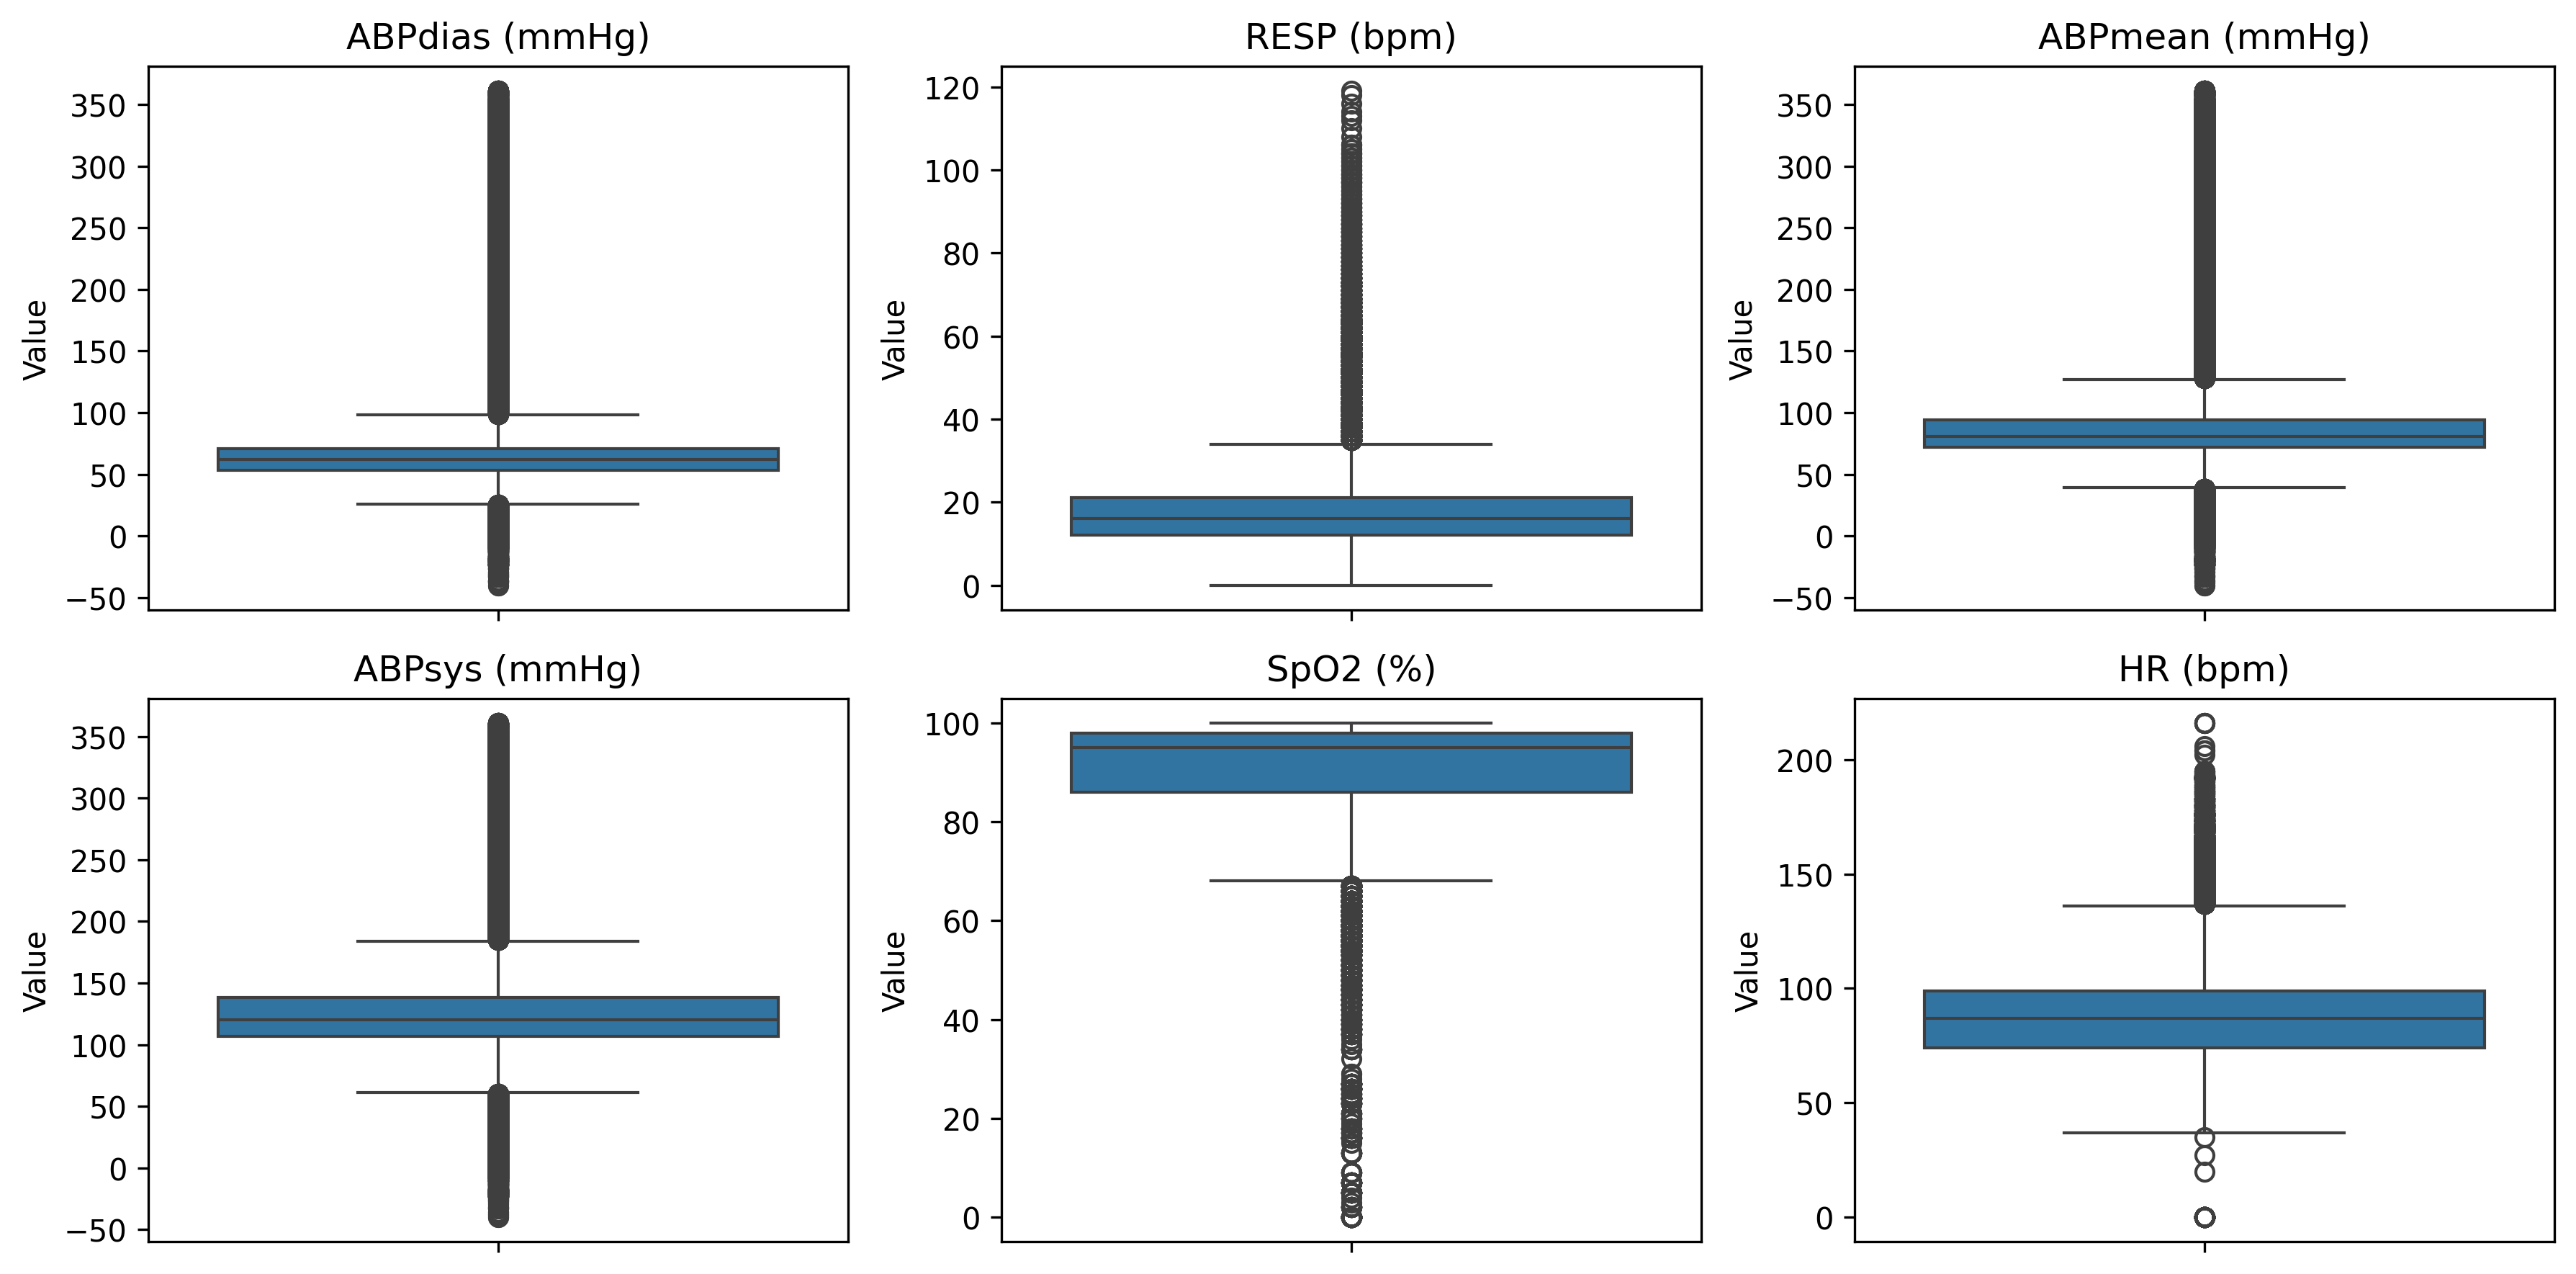

In [16]:
def plot_columns(df):
    import seaborn as sns
    df = df.copy()
    df = df.drop("record_index", axis=1)
    df = df.drop("record", axis=1)
    df = df.dropna()
    print(df.columns)
    num_rows = 2
    num_cols = 3

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6), dpi=300)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Loop through each column and create a violin plot
    for i, column in enumerate(df.columns):
        ax = axes[i]
        sns.boxplot(data=df, y=column, ax=ax)
        ax.set_title(column)
#         ax.set_xlabel(column)
        ax.set_ylabel('Value')

    # Hide any remaining empty subplots
    for i in range(len(df.columns), num_rows * num_cols):
        axes[i].axis('off')

    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()
    
plot_columns(all_df)

In [18]:
all_df.to_csv(fp_downsampled_concatenated_file, index=False)

In [19]:
all_df = pd.read_csv(fp_downsampled_concatenated_file)

In [20]:
all_df.describe()

,record_index,ABPdias (mmHg),RESP (bpm),ABPmean (mmHg),ABPsys (mmHg),SpO2 (%),HR (bpm)
count,7.207482e+06,6.320376e+06,6.497795e+06,6.320376e+06,6.320376e+06,6.812051e+06,7.135349e+06
mean,7.337624e+04,6.298281e+01,1.624711e+01,8.391586e+01,1.241891e+02,6.942284e+01,8.732022e+01
std,4.988713e+04,1.913398e+01,9.045125e+00,2.142368e+01,2.935350e+01,4.298076e+01,1.927226e+01
min,0.000000e+00,-4.000000e+01,0.000000e+00,-4.000000e+01,-4.000000e+01,0.000000e+00,0.000000e+00
25%,3.213200e+04,5.300000e+01,1.200000e+01,7.300000e+01,1.070000e+02,0.000000e+00,7.500000e+01
50%,6.601600e+04,6.100000e+01,1.600000e+01,8.100000e+01,1.200000e+02,9.500000e+01,8.800000e+01
75%,1.084060e+05,7.000000e+01,2.100000e+01,9.300000e+01,1.380000e+02,9.800000e+01,9.800000e+01
max,2.414050e+05,3.610000e+02,1.190000e+02,3.610000e+02,3.610000e+02,1.000000e+02,2.260000e+02


## Set outlier values to NA

In [21]:
all_df.isna().sum()

record_index           0
ABPdias (mmHg)    887106
RESP (bpm)        709687
ABPmean (mmHg)    887106
ABPsys (mmHg)     887106
SpO2 (%)          395431
HR (bpm)           72133
record                 0
dtype: int64

- Drop anything that is 0 – basically means machine disconnected, for any feature in the dataset
- Drop BP > 250 – this is highly unlikely (he told me he will check for us to see if some other threshold is better, but 250 is very safe.)

In [22]:
list(feat_set)

['ABPdias (mmHg)',
 'RESP (bpm)',
 'ABPmean (mmHg)',
 'ABPsys (mmHg)',
 'SpO2 (%)',
 'HR (bpm)']

In [23]:
def set_outliers_to_na(df, predictors):
    df = df.copy()
    # 1. Drop anything that is 0 – basically means machine disconnected, for any feature in the dataset
    df[df[predictors]<=0] = np.nan
    
    # 2. Drop BP > 250 – this is highly unlikely
    bp_cols = ["ABPmean (mmHg)", 'ABPdias (mmHg)', 'ABPsys (mmHg)']
    df[df[bp_cols]>250] = np.nan 
    return df
    
all_df = set_outliers_to_na(all_df, predictors=list(feat_set))

In [24]:
all_df

,record_index,ABPdias (mmHg),RESP (bpm),ABPmean (mmHg),ABPsys (mmHg),SpO2 (%),HR (bpm),record
0,0,89.0,NaN,110.0,159.0,97.0,85.0,048n
1,1,90.0,NaN,111.0,161.0,97.0,85.0,048n
2,2,90.0,NaN,111.0,161.0,97.0,85.0,048n
3,3,92.0,NaN,113.0,163.0,97.0,85.0,048n
4,4,92.0,NaN,113.0,164.0,97.0,85.0,048n
...,...,...,...,...,...,...,...,...
7207477,62104,NaN,NaN,NaN,NaN,NaN,NaN,476n
7207478,62105,NaN,NaN,NaN,NaN,NaN,NaN,476n
7207479,62106,NaN,NaN,NaN,NaN,NaN,NaN,476n
7207480,62107,NaN,NaN,NaN,NaN,NaN,NaN,476n


In [25]:
all_df.describe()

,record_index,ABPdias (mmHg),RESP (bpm),ABPmean (mmHg),ABPsys (mmHg),SpO2 (%),HR (bpm)
count,7.207482e+06,6.256682e+06,5.780386e+06,6.256825e+06,6.256652e+06,4.930607e+06,7.058686e+06
mean,7.337624e+04,6.302049e+01,1.826355e+01,8.416617e+01,1.248409e+02,9.591353e+01,8.826858e+01
std,4.988713e+04,1.485357e+01,7.425692e+00,1.757085e+01,2.602730e+01,3.383506e+00,1.708048e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+01
25%,3.213200e+04,5.300000e+01,1.300000e+01,7.300000e+01,1.070000e+02,9.400000e+01,7.600000e+01
50%,6.601600e+04,6.100000e+01,1.700000e+01,8.100000e+01,1.200000e+02,9.700000e+01,8.800000e+01
75%,1.084060e+05,7.000000e+01,2.200000e+01,9.300000e+01,1.380000e+02,9.800000e+01,9.800000e+01
max,2.414050e+05,2.500000e+02,1.190000e+02,2.500000e+02,2.500000e+02,1.000000e+02,2.260000e+02


Index(['ABPdias (mmHg)', 'RESP (bpm)', 'ABPmean (mmHg)', 'ABPsys (mmHg)',
       'SpO2 (%)', 'HR (bpm)'],
      dtype='object')


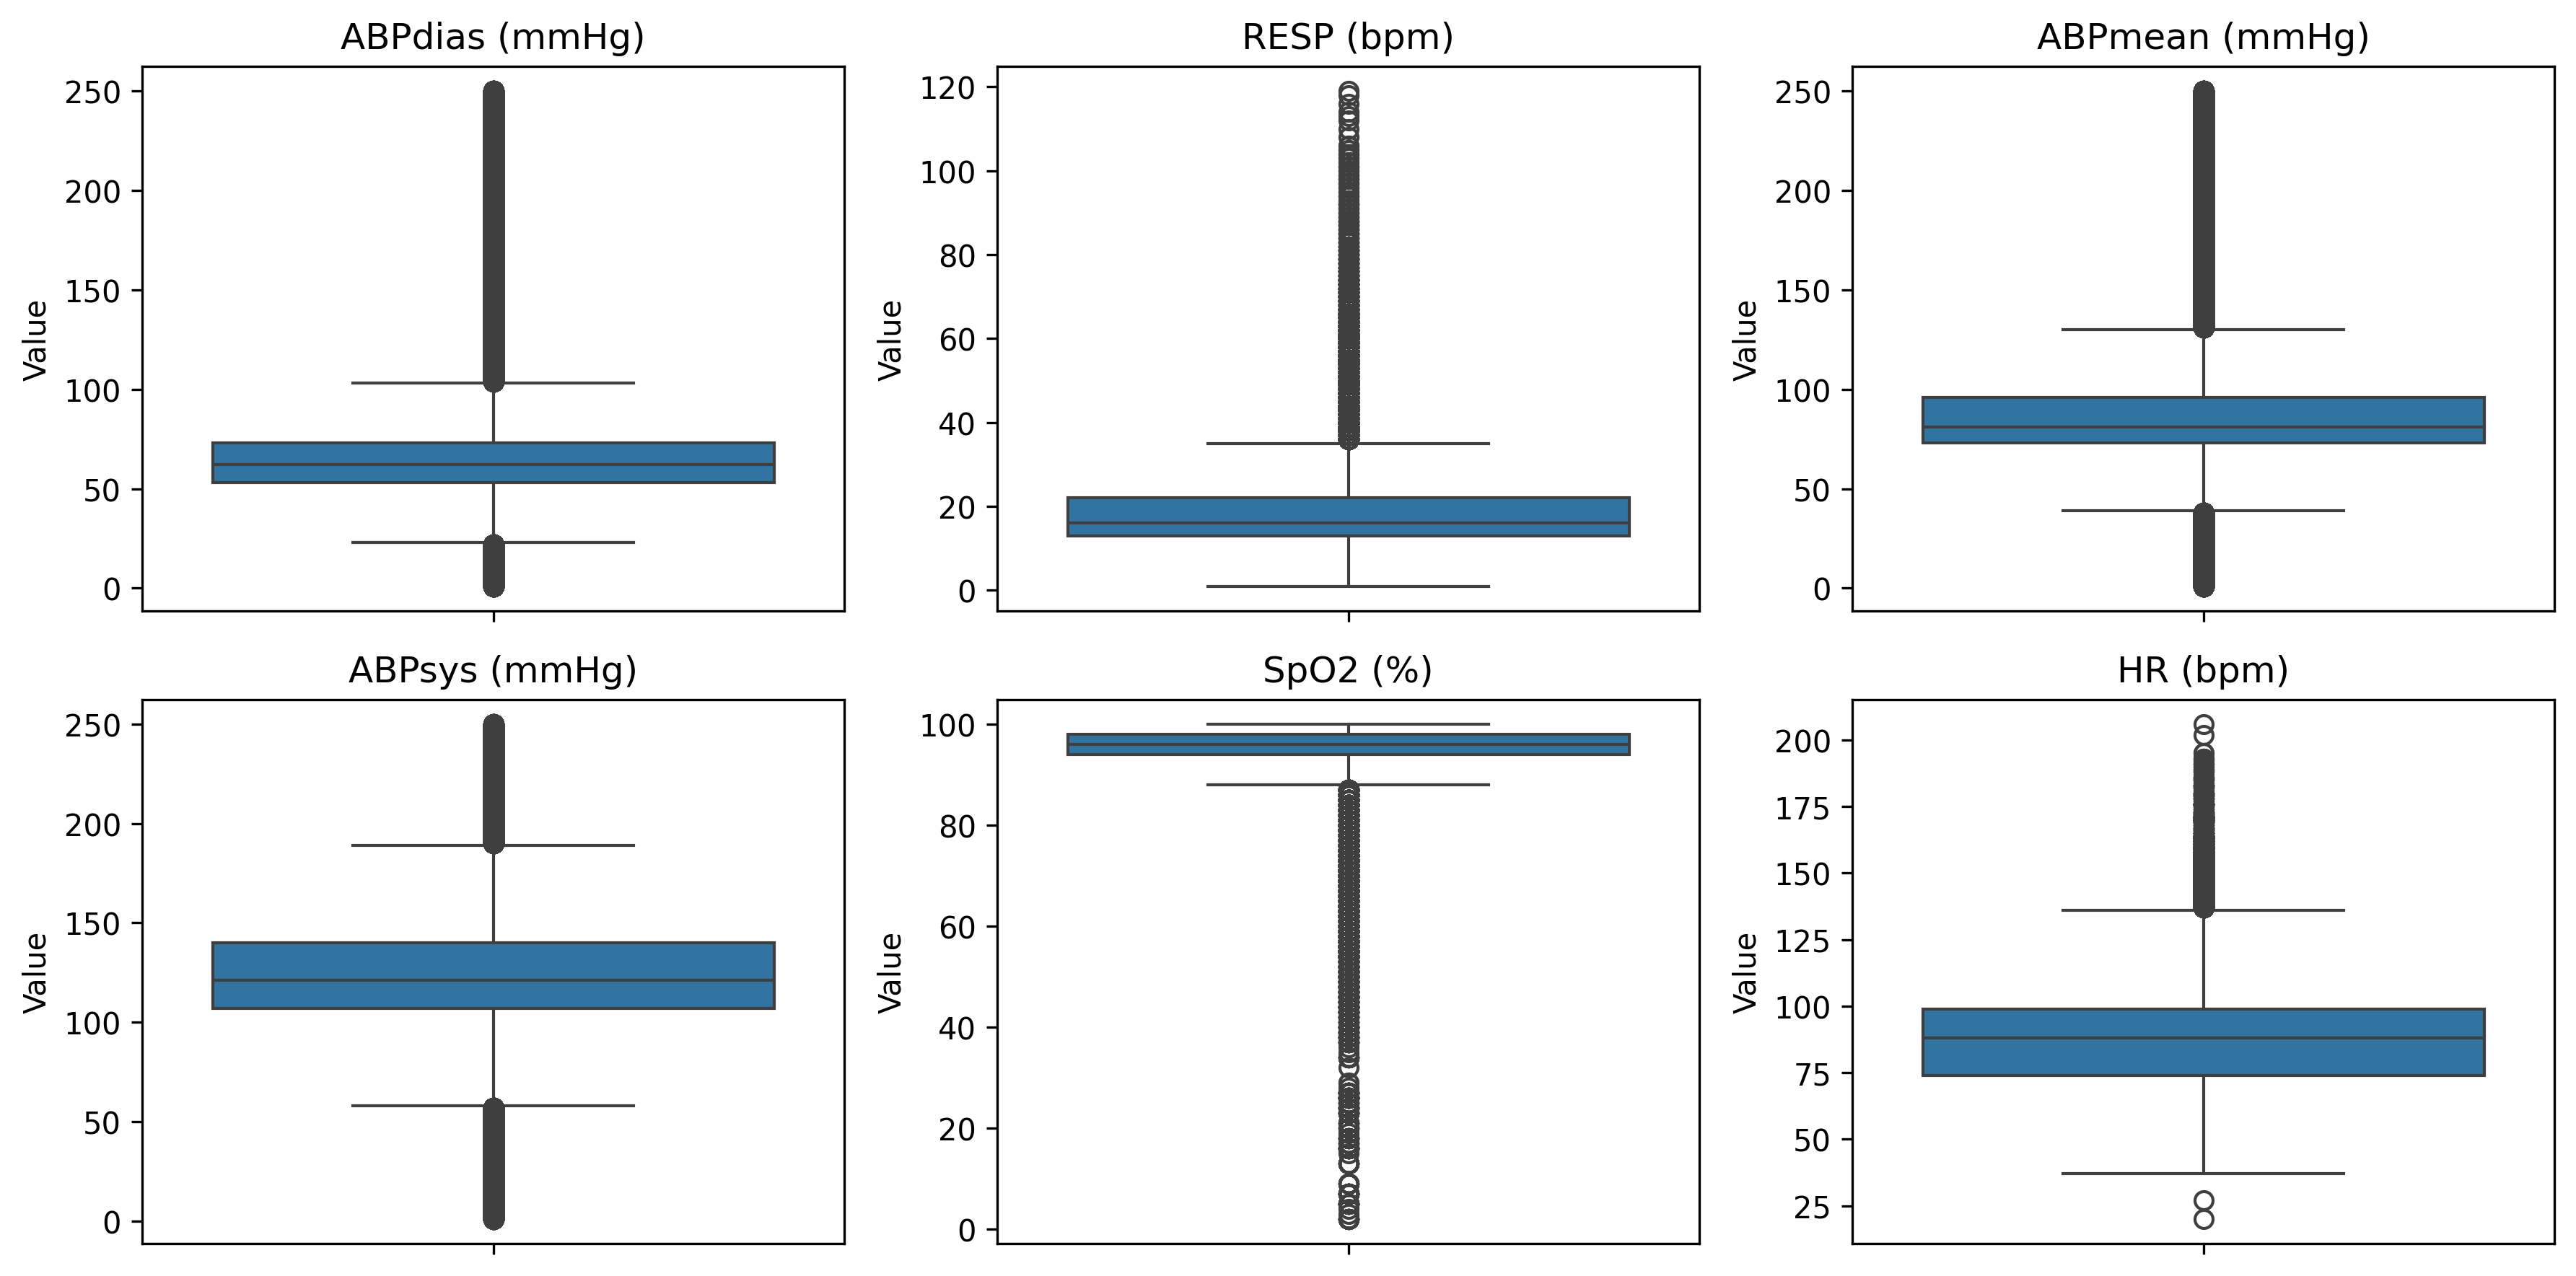

In [26]:
plot_columns(all_df)

## Standardise Data

In [27]:
def standardise_data(df, train_records, valid_records, test_records, predictors):
    from sklearn.preprocessing import StandardScaler
    df_train, df_valid, df_test = (
        df[df["record"].isin(train_records)], df[df["record"].isin(valid_records)],
        df[df["record"].isin(test_records)]
    )
    scaler = StandardScaler()
    scaler.fit(df_train[predictors])
    df_train[predictors] = scaler.transform(df_train[predictors])
    df_valid[predictors] = scaler.transform(df_valid[predictors])
    df_test[predictors] = scaler.transform(df_test[predictors])
    
    return pd.concat([df_train, df_valid, df_test]), scaler

all_df, scaler = standardise_data(all_df, train_records, valid_records, test_records, list(feat_set))
all_df.head()

/tmp/ipykernel_2929017/3431272954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[predictors] = scaler.transform(df_train[predictors])
/tmp/ipykernel_2929017/3431272954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid[predictors] = scaler.transform(df_valid[predictors])
/tmp/ipykernel_2929017/3431272954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,record_index,ABPdias (mmHg),RESP (bpm),ABPmean (mmHg),ABPsys (mmHg),SpO2 (%),HR (bpm),record
0,0,1.771772,NaN,1.37323,1.133825,0.27073,-0.160195,048n
1,1,1.839573,NaN,1.42918,1.206455,0.27073,-0.160195,048n
2,2,1.839573,NaN,1.42918,1.206455,0.27073,-0.160195,048n
3,3,1.975173,NaN,1.54108,1.279086,0.27073,-0.160195,048n
4,4,1.975173,NaN,1.54108,1.315401,0.27073,-0.160195,048n


In [28]:
all_df.shape

(7207482, 8)

In [29]:
def save_scaler(scaler, fp_downsampled_scaler_file):
    import pickle 
    with open(fp_downsampled_scaler_file, 'wb') as handle:
        pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)
save_scaler(scaler, fp_downsampled_scaler_file)

In [30]:
all_df[all_df["record"]=='052n'].shape[0]/60

1283.9666666666667

In [31]:
all_df["record"].unique()

array(['048n', '052n', '054n', '211n', '214n', '216n', '220n', '221n',
       '226n', '230n', '232n', '235n', '237n', '241n', '242n', '243n',
       '245n', '259n', '260n', '267n', '268n', '269n', '293n', '401n',
       '403n', '409n', '414n', '415n', '417n', '418n', '427n', '442n',
       '449n', '455n', '457n', '464n', '471n', '472n', '474n', '476n',
       '212n', '231n', '253n', '413n', '466n', '467n', '055n', '213n',
       '240n', '248n', '252n', '254n', '264n', '271n', '291n', '408n',
       '465n'], dtype=object)

## Downsample Time Series Data

In [32]:
def downsample_all_df(all_df, feat_set, window=60):
    all_downsampled_df_list = []
    feat_set = list(feat_set)
    for record, record_df in all_df.groupby("record"):
        window_groups = record_df.groupby((record_df.index//window).astype('i'))
        # Downsample with mean
        downsampled_df = window_groups[feat_set].mean()
        downsampled_df.columns = [col + "_mean" for col in feat_set]
        # Downsample with std
        std_cols = [col + "_std" for col in feat_set]
        downsampled_df[std_cols] = window_groups[feat_set].std()
        downsampled_df["record"] = record
        # Get record df index
        downsampled_df = downsampled_df.reset_index(drop=True)
        downsampled_df["record_index"] = downsampled_df.index
        all_downsampled_df_list.append(downsampled_df)
    all_downsampled_df = pd.concat(all_downsampled_df_list)
    return all_downsampled_df
downsampled_df = downsample_all_df(all_df, feat_set, window=60)
downsampled_df.head(10)

,ABPdias (mmHg)_mean,RESP (bpm)_mean,ABPmean (mmHg)_mean,ABPsys (mmHg)_mean,SpO2 (%)_mean,HR (bpm)_mean,ABPdias (mmHg)_std,RESP (bpm)_std,ABPmean (mmHg)_std,ABPsys (mmHg)_std,SpO2 (%)_std,HR (bpm)_std,record,record_index
0,1.222590,NaN,0.912202,0.610158,0.075853,-0.152358,0.783799,NaN,0.708760,0.841499,0.200492,0.067019,048n,0
1,0.029305,NaN,0.032295,-0.021607,-0.675816,-0.253263,0.231963,NaN,0.265037,0.373858,0.186225,0.031163,048n,1
2,-0.255456,NaN,-0.117837,-0.099080,-0.740775,-0.309104,0.068030,NaN,0.064187,0.086514,0.153486,0.047749,048n,2
3,0.065465,NaN,0.189887,0.144838,-0.801094,-0.221914,0.335923,NaN,0.239340,0.156715,0.176259,0.054569,048n,3
4,1.572892,NaN,1.339660,1.044852,-0.264647,-0.031860,0.169267,NaN,0.130383,0.149571,0.197597,0.090863,048n,4
5,1.549162,NaN,1.309820,1.102352,0.201131,-0.067127,0.180936,NaN,0.195579,0.192333,0.121566,0.087447,048n,5
6,1.735612,NaN,1.521497,1.190114,0.349609,-0.086721,0.109158,NaN,0.139666,0.156438,0.126509,0.060860,048n,6
7,2.771827,NaN,2.417630,1.934577,-0.230382,0.319839,0.341092,NaN,0.312904,0.321315,0.412610,0.166313,048n,7
8,2.593286,NaN,2.139745,1.705791,-1.078782,0.262039,0.535913,NaN,0.447635,0.358421,0.282274,0.054641,048n,8
9,1.648602,NaN,1.297697,0.894749,-1.842548,0.098436,0.170927,NaN,0.171392,0.186051,0.173164,0.077438,048n,9


In [33]:
downsampled_df.shape

(120179, 14)

In [34]:
downsampled_df[downsampled_df["record"]=='052n']

,ABPdias (mmHg)_mean,RESP (bpm)_mean,ABPmean (mmHg)_mean,ABPsys (mmHg)_mean,SpO2 (%)_mean,HR (bpm)_mean,ABPdias (mmHg)_std,RESP (bpm)_std,ABPmean (mmHg)_std,ABPsys (mmHg)_std,SpO2 (%)_std,HR (bpm)_std,record,record_index
0,0.695186,0.290796,1.629243,1.748984,0.635296,-0.259669,0.464431,0.067920,0.034349,0.032658,0.130262,0.057036,052n,0
1,0.941219,0.097975,1.624072,1.754816,0.549126,-0.269917,0.059377,0.066715,0.046631,0.027324,0.000000,0.060707,052n,1
2,0.934439,0.073596,1.586772,1.742711,0.549126,-0.294409,0.089865,0.106628,0.086488,0.043004,0.000000,0.116102,052n,2
3,0.998849,0.060298,1.659507,1.783263,0.549126,-0.254243,0.057476,0.100552,0.055561,0.036063,0.000000,0.034563,052n,3
4,1.273440,0.722980,1.846007,1.814737,0.604805,-0.141582,0.436697,0.520311,0.390826,0.182819,0.210091,0.144990,052n,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,-0.288226,0.394963,0.324167,1.084799,0.576966,-0.703908,0.095143,0.164408,0.105368,0.064071,0.084224,0.116370,052n,1280
1281,-0.375237,0.000457,0.228120,1.049694,0.590885,-0.862613,0.066836,0.159597,0.051985,0.031710,0.100246,0.061625,052n,1281
1282,-0.289356,0.355069,0.337222,1.110825,0.535206,-0.842040,0.115223,0.244212,0.121227,0.066516,0.129924,0.162406,052n,1282
1283,-0.370717,-0.037221,0.250500,1.073299,0.521286,-0.909637,0.033496,0.177344,0.043542,0.028888,0.175325,0.085643,052n,1283


In [35]:
downsampled_df.to_csv(fp_downsampled_continuous_file, index=False)

## Flatten Data and Generate Data for Training

In [36]:
# Update feat set
downsampled_feat_set = [f"{feat}_mean" for feat in feat_set] + [f"{feat}_std" for feat in feat_set] 
print(downsampled_feat_set)

['ABPdias (mmHg)_mean', 'RESP (bpm)_mean', 'ABPmean (mmHg)_mean', 'ABPsys (mmHg)_mean', 'SpO2 (%)_mean', 'HR (bpm)_mean', 'ABPdias (mmHg)_std', 'RESP (bpm)_std', 'ABPmean (mmHg)_std', 'ABPsys (mmHg)_std', 'SpO2 (%)_std', 'HR (bpm)_std']


In [37]:
pred_cols = [f"{feat}_mean" for feat in feat_set]
print(pred_cols)

['ABPdias (mmHg)_mean', 'RESP (bpm)_mean', 'ABPmean (mmHg)_mean', 'ABPsys (mmHg)_mean', 'SpO2 (%)_mean', 'HR (bpm)_mean']


In [38]:
def generate_data_for_training(
    downsampled_df, downsampled_feat_set, input_mins, prediction_mins, pred_cols):
    data = []
    downsampled_feat_set = list(downsampled_feat_set)
    # The flattened features for past input_days
    new_feat_set = [feat + " Min" + str(i) for i in range(input_mins) for feat in downsampled_feat_set] + \
        [feat + " PredMin" + str(i) for i in prediction_mins for feat in pred_cols] + \
        ["target_index"] + ["input_start_index"] + ["input_end_index"] + ["record"]

    # Sort prediction mins e.g. 1, 3, 2 -> 1, 2, 3
    prediction_mins.sort() 
    # For each record
    record_groups = downsampled_df.groupby("record")
    for record, record_df in tqdm(record_groups):
        record_df = record_df.set_index("record_index")
        # Go through possible end_input indices
        for end_input in record_df.index:
            # Not enough input information
            if end_input < input_mins-1:
                continue
            # Not enough pred information
            elif end_input + prediction_mins[-1] > record_df.index[-1]:
                break
            start_input = end_input - input_mins + 1
            # (input) 0 1 2 3 4, (output) 5, 6, 7
            pred_indices = [end_input + pred_min for pred_min in prediction_mins]
            # Get the rows we are predicting
            pred_rows = record_df[pred_cols].loc[pred_indices]
            # Get rows we are using to predict
            input_rows = record_df[downsampled_feat_set].loc[start_input:end_input]
            
            # Get input
            feat_list = list(input_rows.values.flatten())
            # Get prediction
            pred_list = list(pred_rows.values.flatten())
            
            # Add row
            new_row = (
                feat_list + pred_list +
                [pred_rows.index.tolist(), start_input, end_input, record]
            )
            data.append(new_row)
    return pd.DataFrame(data, columns=new_feat_set)

flattened_df = generate_data_for_training(
    downsampled_df, downsampled_feat_set, input_mins=5, prediction_mins=[1, 2, 3], pred_cols=pred_cols)
flattened_df.head()

100%|███████████████████████████████████████████| 57/57 [00:55<00:00,  1.02it/s]


,ABPdias (mmHg)_mean Min0,RESP (bpm)_mean Min0,ABPmean (mmHg)_mean Min0,ABPsys (mmHg)_mean Min0,SpO2 (%)_mean Min0,HR (bpm)_mean Min0,ABPdias (mmHg)_std Min0,RESP (bpm)_std Min0,ABPmean (mmHg)_std Min0,ABPsys (mmHg)_std Min0,...,ABPdias (mmHg)_mean PredMin3,RESP (bpm)_mean PredMin3,ABPmean (mmHg)_mean PredMin3,ABPsys (mmHg)_mean PredMin3,SpO2 (%)_mean PredMin3,HR (bpm)_mean PredMin3,target_index,input_start_index,input_end_index,record
0,1.222590,NaN,0.912202,0.610158,0.075853,-0.152358,0.783799,NaN,0.708760,0.841499,...,2.771827,NaN,2.417630,1.934577,-0.230382,0.319839,"[5, 6, 7]",0,4,048n
1,0.029305,NaN,0.032295,-0.021607,-0.675816,-0.253263,0.231963,NaN,0.265037,0.373858,...,2.593286,NaN,2.139745,1.705791,-1.078782,0.262039,"[6, 7, 8]",1,5,048n
2,-0.255456,NaN,-0.117837,-0.099080,-0.740775,-0.309104,0.068030,NaN,0.064187,0.086514,...,1.648602,NaN,1.297697,0.894749,-1.842548,0.098436,"[7, 8, 9]",2,6,048n
3,0.065465,NaN,0.189887,0.144838,-0.801094,-0.221914,0.335923,NaN,0.239340,0.156715,...,1.754822,NaN,1.345255,0.782172,-0.325037,0.032798,"[8, 9, 10]",3,7,048n
4,1.572892,NaN,1.339660,1.044852,-0.264647,-0.031860,0.169267,NaN,0.130383,0.149571,...,1.235020,NaN,1.001162,0.639332,-0.156144,-0.025982,"[9, 10, 11]",4,8,048n


In [39]:
flattened_df.shape # previously, 119780

(119780, 82)

## Remove Rows With NaN Values

In [40]:
flattened_df = flattened_df.dropna()
flattened_df.head()

,ABPdias (mmHg)_mean Min0,RESP (bpm)_mean Min0,ABPmean (mmHg)_mean Min0,ABPsys (mmHg)_mean Min0,SpO2 (%)_mean Min0,HR (bpm)_mean Min0,ABPdias (mmHg)_std Min0,RESP (bpm)_std Min0,ABPmean (mmHg)_std Min0,ABPsys (mmHg)_std Min0,...,ABPdias (mmHg)_mean PredMin3,RESP (bpm)_mean PredMin3,ABPmean (mmHg)_mean PredMin3,ABPsys (mmHg)_mean PredMin3,SpO2 (%)_mean PredMin3,HR (bpm)_mean PredMin3,target_index,input_start_index,input_end_index,record
18,0.656458,0.756224,0.787620,0.701673,-0.095824,0.014185,0.068855,0.975804,0.095789,0.134008,...,1.023709,0.257551,0.954537,0.893539,-0.230382,-0.227792,"[23, 24, 25]",18,22,048n
19,0.421417,-0.150253,0.395037,0.216258,0.052653,-0.091619,0.553956,0.333454,0.520543,0.416795,...,0.940089,0.590000,0.883667,0.730120,-0.235022,-0.282653,"[24, 25, 26]",19,23,048n
20,0.120835,-0.223392,0.114355,0.063734,-0.132944,-0.198402,0.375286,0.401908,0.308951,0.266733,...,1.050829,0.463669,1.039395,0.822119,-0.230382,-0.231711,"[25, 26, 27]",20,24,048n
21,0.607867,0.339555,0.601120,0.493465,-0.689736,-0.163586,0.178803,0.303800,0.154450,0.129817,...,0.663238,0.242036,0.663597,0.526754,-0.081905,-0.225833,"[26, 27, 28]",21,25,048n
22,0.714088,-0.615682,0.649610,0.555201,-0.527338,-0.294409,0.261310,0.436255,0.203398,0.214778,...,0.611258,0.124571,0.421147,0.089155,-0.583017,-0.265019,"[27, 28, 29]",22,26,048n


In [41]:
flattened_df.shape # previously 90000+

(59566, 82)

<Axes: >

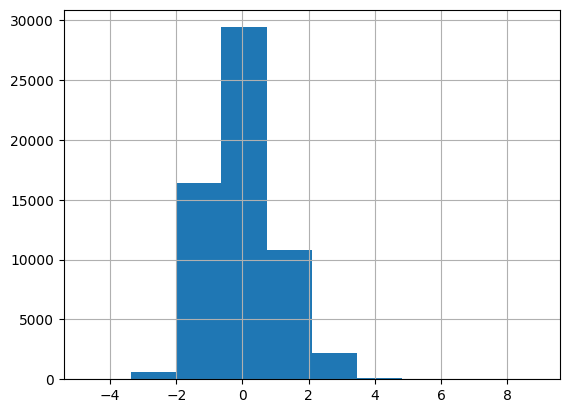

In [42]:
flattened_df["ABPmean (mmHg)_mean PredMin1"].hist()

In [43]:
def label_train_valid_test_samples(df, train_records, valid_records, test_records):
    df = df.copy()
    df["train"] = df["record"].isin(train_records)
    df["valid"] = df["record"].isin(valid_records)
    df["test"] = df["record"].isin(test_records)
    return df

train_valid_test_labelled_df = label_train_valid_test_samples(flattened_df, train_records, valid_records, test_records)
train_valid_test_labelled_df.head()

,ABPdias (mmHg)_mean Min0,RESP (bpm)_mean Min0,ABPmean (mmHg)_mean Min0,ABPsys (mmHg)_mean Min0,SpO2 (%)_mean Min0,HR (bpm)_mean Min0,ABPdias (mmHg)_std Min0,RESP (bpm)_std Min0,ABPmean (mmHg)_std Min0,ABPsys (mmHg)_std Min0,...,ABPsys (mmHg)_mean PredMin3,SpO2 (%)_mean PredMin3,HR (bpm)_mean PredMin3,target_index,input_start_index,input_end_index,record,train,valid,test
18,0.656458,0.756224,0.787620,0.701673,-0.095824,0.014185,0.068855,0.975804,0.095789,0.134008,...,0.893539,-0.230382,-0.227792,"[23, 24, 25]",18,22,048n,True,False,False
19,0.421417,-0.150253,0.395037,0.216258,0.052653,-0.091619,0.553956,0.333454,0.520543,0.416795,...,0.730120,-0.235022,-0.282653,"[24, 25, 26]",19,23,048n,True,False,False
20,0.120835,-0.223392,0.114355,0.063734,-0.132944,-0.198402,0.375286,0.401908,0.308951,0.266733,...,0.822119,-0.230382,-0.231711,"[25, 26, 27]",20,24,048n,True,False,False
21,0.607867,0.339555,0.601120,0.493465,-0.689736,-0.163586,0.178803,0.303800,0.154450,0.129817,...,0.526754,-0.081905,-0.225833,"[26, 27, 28]",21,25,048n,True,False,False
22,0.714088,-0.615682,0.649610,0.555201,-0.527338,-0.294409,0.261310,0.436255,0.203398,0.214778,...,0.089155,-0.583017,-0.265019,"[27, 28, 29]",22,26,048n,True,False,False


In [44]:
train_valid_test_labelled_df.to_csv(fp_downsampled_dropna_file)